###**Conjunto de datos bancarios - Objetivos de marketing**

Los depósitos a plazo son una fuente importante de ingresos para un banco.
Un depósito a plazo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte por una tasa de interés acordada durante un período fijo de tiempo o plazo.
El banco tiene varios planes de divulgación para vender depósitos a plazo a sus
clientes, como marketing por correo electrónico, anuncios, marketing telefónico y marketing digital.
Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a las personas. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar a los clientes con más probabilidades de convertir de antemano para que puedan ser dirigidos específicamente a través de una llamada.

**Descripciones detalladas de las columnas**

**Datos del cliente bancario:**

* 1 - edad (numérica)
* 2 - trabajo: tipo de trabajo (categórico: "admin.","desconocido","desempleado","gestión","empleada doméstica","empresario","estudiante", "obrero","autónomo","jubilado","técnico","servicios")
* 3 - marital : estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
* 4 - Educación (categórica: "desconocido", "secundario", "primario",
"terciario")
* 5 - Incumplimiento: ¿Tiene crédito en mora? (binario: "sí","no")
* 6 - Saldo: Saldo medio anual, en euros (numérico)
* 7 - Vivienda: ¿Tiene préstamo de vivienda? (binario: "sí","no")
* 8 - Préstamo: ¿Tiene préstamo personal? (binario: "sí","no")
**Relacionado con el último contacto de la campaña actual:**
* 9 - Contacto: Tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
* 10 - día: último contacto día del mes (numérico)
* 11 - mes: último contacto mes del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")
* 12 - duración: duración del último contacto, en segundos (numérico)

 **Otros atributos:**
* 13 - Campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
* 14 - días: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
* 15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
* 16 - Poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")


**Variable de salida (objetivo deseado):**
* 17 - y - ¿El cliente ha suscrito un depósito a plazo? (binario: "sí","no")

El en la primera estapa de este proyecto se utilizara la parte de test del datase, y luego cuanto se someta el dataset a la parte de evaluacion se podria utilizar el dataset train. Caso que se requiere, se podrian aderir ambos datset con el finde de que pueda arrojar distintos resultados al momento de la evaluacion ya que la divicion entre test y train el programa lo realiza de manera aleatoria


In [1]:
#importar librerias y descarga de dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import platform
if os.access('test.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv
    else:
        !wget https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv

--2023-09-19 22:33:06--  https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461474 (451K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 450.66K  --.-KB/s    in 0.04s   

2023-09-19 22:33:06 (11.6 MB/s) - ‘test.csv’ saved [461474/461474]



In [2]:
#descarga del dataset
if os.access('train.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv
    else:
        !wget https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv


--2023-09-19 22:33:07--  https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   4.40M  --.-KB/s    in 0.07s   

2023-09-19 22:33:07 (58.9 MB/s) - ‘train.csv’ saved [4610348/4610348]



In [3]:
#lectura de ambos dataset
df1 = pd.read_csv('test.csv',sep = ';')
df2 = pd.read_csv('train.csv',sep = ';')


In [4]:
#Concatenar datasets
df = pd.concat([df1,df2], axis=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
#filas y columnas del dataset
df.shape

(49732, 17)

In [6]:
#renombrar columnas del dataset
df.columns = ['edad', 'tipo_trabajo','estado_civil', 'educacion', 'moratoria', 'ingresos', 'hipoteca', 'prestamo', 'contacto', 'dia', 'mes', 'duracion', 'contactado','dias_camp_anterior','contactos_camp_anterior','resultado_camp_anterior','y']
df.head()

,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,mes,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#Seaborn

<Axes: xlabel='y', ylabel='Count'>

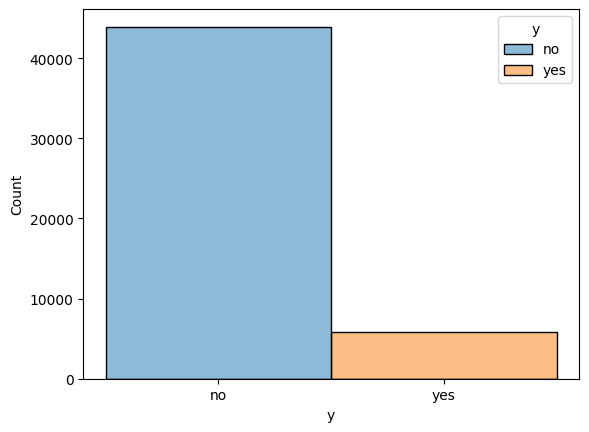

In [7]:
#En este grafico queda demostrado que cantidad de personas NO aceptan depositar a plazo fijo su diner
sns.histplot(data=df, x="y", hue='y')

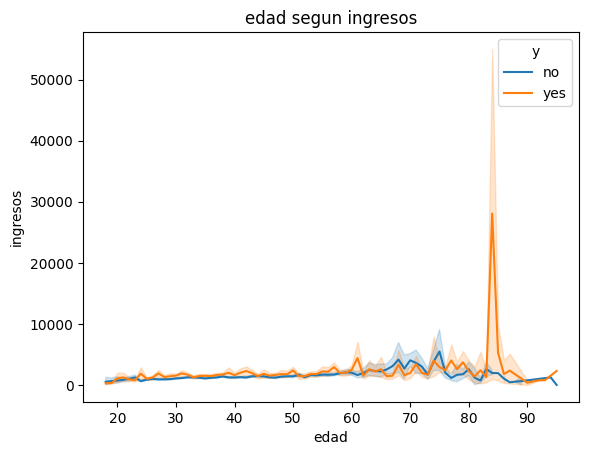

In [8]:
#Muestra una comparativa entre la edad de las personas y los ingresos que persiven y si aceptaron el servicio del banco o no.
sns.lineplot(data=df, x="edad",y='ingresos', hue="y")
plt.xlabel('edad')
plt.ylabel('ingresos')
plt.title('edad segun ingresos')
plt.show()

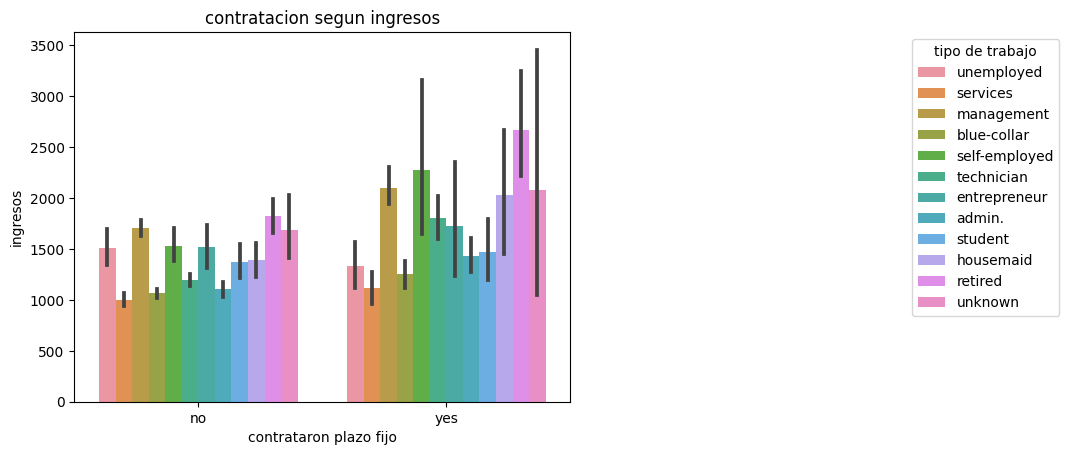

In [29]:
#en este grafico se intenta demostrar los ingresos percividos segun su tipo de trabajo y si contrataron el servicio del banco o no
ax = sns.barplot(data=df, x="y",y='ingresos', hue="tipo_trabajo")
plt.xlabel('contrataron plazo fijo')
plt.ylabel('ingresos')
ax.legend_.remove()
plt.title('contratacion segun ingresos')
plt.legend(title='tipo de trabajo', loc='upper right', bbox_to_anchor=(2,1))
plt.show()

In [ ]:
df.head()

,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,mes,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Text(0.5, 0, 'Estado civil')

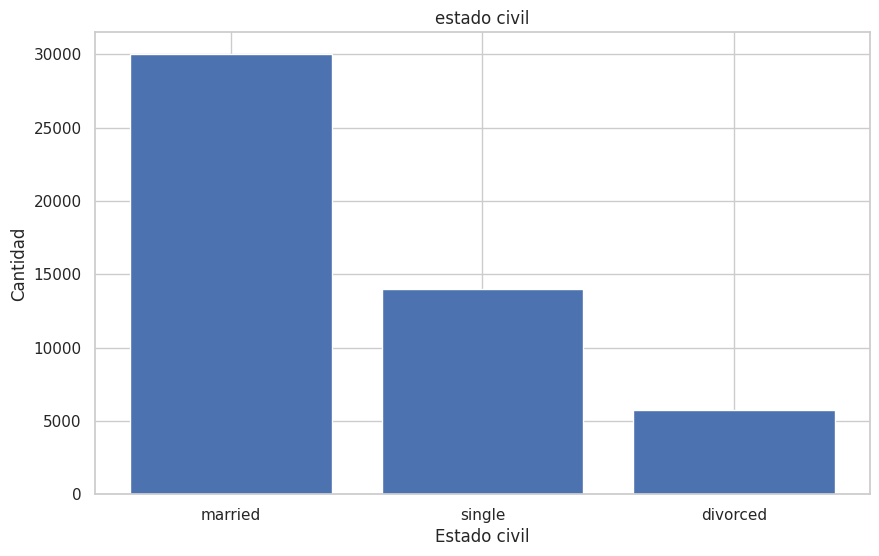

In [ ]:
#en este grafico se muestra la que cantidad de personas y en que estado civil se encuentra. Se puede suponer que segun el estado civil los ingresos pueden variar.
estado_civil=df.estado_civil.value_counts()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(estado_civil.index, estado_civil)
ax.set_title('estado civil')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Estado civil')

Text(0.5, 1.0, 'tipos de empleo')

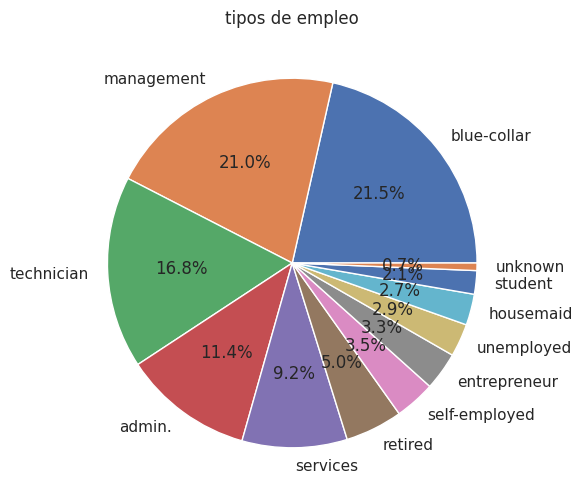

In [ ]:
#Tipo de empleo en porcentajes. Dando a conocer que el 5% son jubilados de los cules como vimos en el grafico anterior tienen mayores ingresos y contratan eel deposito a plazo fijo
empleo = df.tipo_trabajo.value_counts()
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(empleo, labels = empleo.index,autopct='%1.1f%%')
ax.set_title('tipos de empleo')

Text(0.5, 0, 'Resultado')

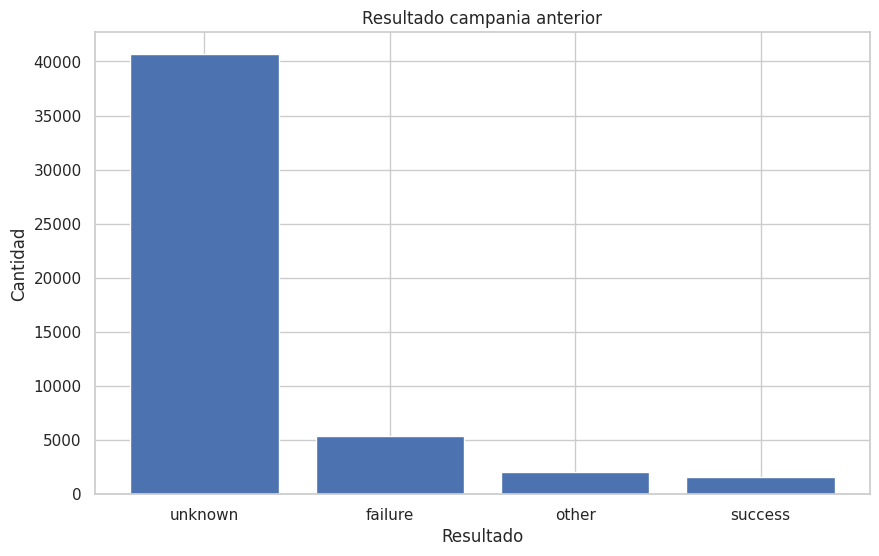

In [ ]:
#En este grafico se logra ver que tan poco exitosa fue la campania anterior, al igual que l presente
resultado_campania_anterior=df.resultado_camp_anterior.value_counts()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(resultado_campania_anterior.index, resultado_campania_anterior)
ax.set_title('Resultado campania anterior')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Resultado')